In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Linear_Regression\Datasets\modified_synthetic_economic_data.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [31]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [32]:
df.drop(['year','month'],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


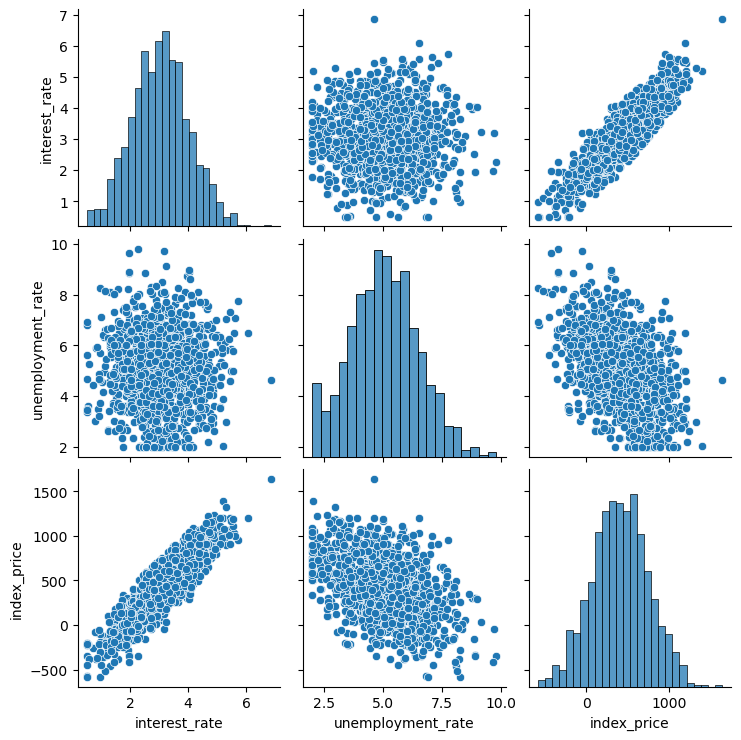

In [33]:
sns.pairplot(df)

In [34]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


Text(0, 0.5, 'Unemployment Rate')

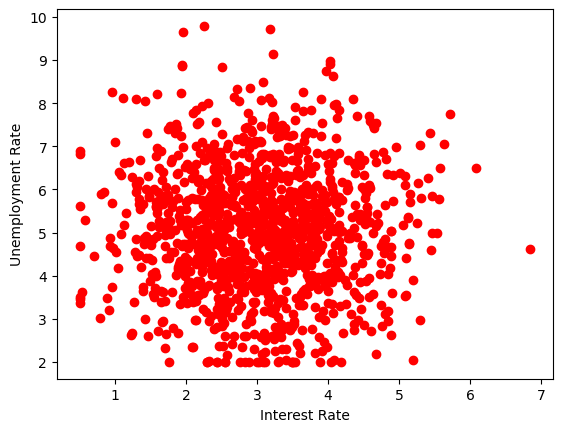

In [35]:
# Visualize the datapoints
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [36]:
# import pandas as pd

# # Example DataFrame
# data = {
#     'Column1': [10, 20, 30, 40, 50],
#     'Column2': [15, 25, 35, 45, 55],
#     'Column3': [20, 30, 40, 50, 60]
# }
# df = pd.DataFrame(data)

# # Selecting 4th row (index 3) and 2nd column (index 1)
# y = df.iloc[3:4, -2:-1]   # a 2d array
# print("Result (DataFrame):")
# print(y)

# # Selecting value at 3rd row (index 2) and 1st column (index 0)
# value = df.iloc[1, 0]
# print("\nSingle value (3rd row, 1st column):", value)
# print(y.shape)


In [37]:
# independent and dependent features
# X = df[['interest_rate','unemployment_rate']]

X = df.iloc[:,:-1]
y = df.iloc[:,-1] # all rows for the last column
X

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07
...,...,...
1195,3.44,2.83
1196,2.98,3.62
1197,3.55,3.49
1198,3.22,5.31


In [38]:
y

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

In [39]:
# train test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

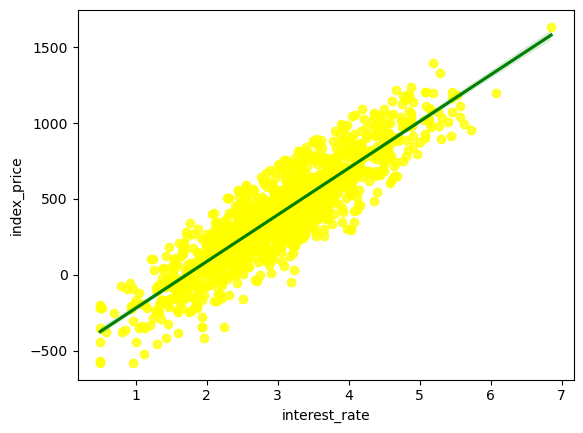

In [45]:
sns.regplot(x=df['interest_rate'], y=df['index_price'], color='yellow', line_kws={"color": "green"})
plt.show()


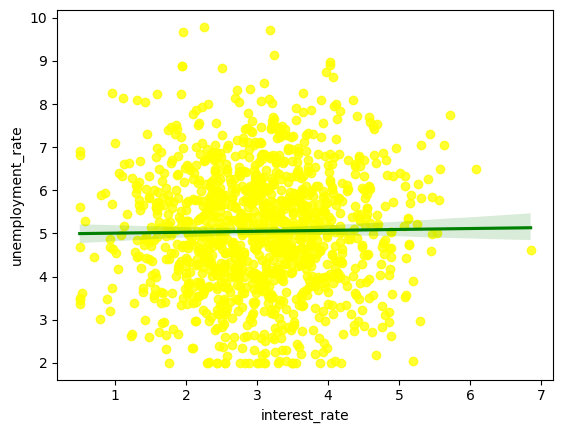

In [46]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'], color='yellow', line_kws={"color": "green"})
plt.show()


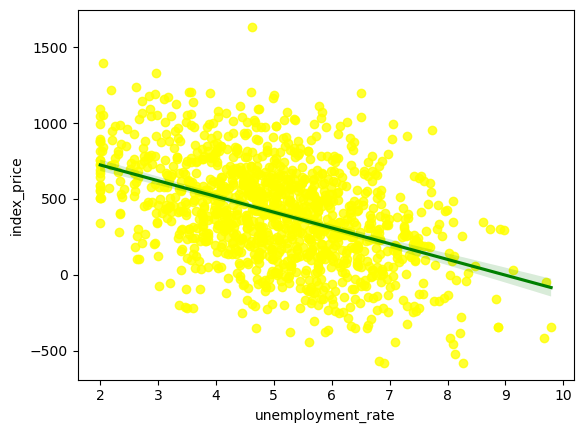

In [47]:
sns.regplot(x=df['unemployment_rate'], y=df['index_price'], color='yellow', line_kws={"color": "green"})
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [51]:
# Cross Validation
from sklearn.model_selection import cross_val_score 

# estimator means model
validation_score = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [52]:
print(validation_score)
np.mean(validation_score)

[-0.51390153 -1.05504373 -0.31625773]


-0.6284009985562211

In [53]:
y_pred = reg.predict(X_test)


In [55]:
# Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  4432.203259139956
MAE:  56.75284835722712
RMSE:  66.57479447313342


In [54]:
from sklearn.metrics import r2_score 

score = r2_score(y_test,y_pred)
print("R-Squared: ",score)

R-Squared:  0.9646798858999801


In [56]:
# Adjusted R Square
n = len(y_test)
k = X_test.shape[1]  # number of predictor variables 
print(n,k)
r_adj = 1 - (1-score)*((n-1)/(n-k-1))
print("Adjusted R Squared: ",r_adj)

300 2
Adjusted R Squared:  0.9644420400137846


### Assumptions

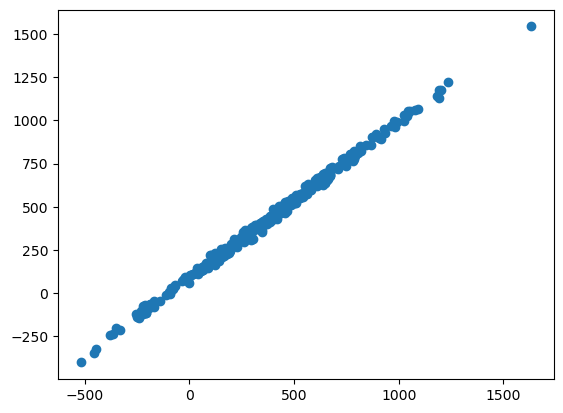

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
residual = y_test-y_pred
print(residual)

366    -42.893314
744    -31.538897
1075   -69.907845
706    -99.228612
498    -82.857602
          ...    
870    -56.839448
284     27.249257
368    -48.608161
1128   -52.763220
759    -25.246870
Name: index_price, Length: 300, dtype: float64


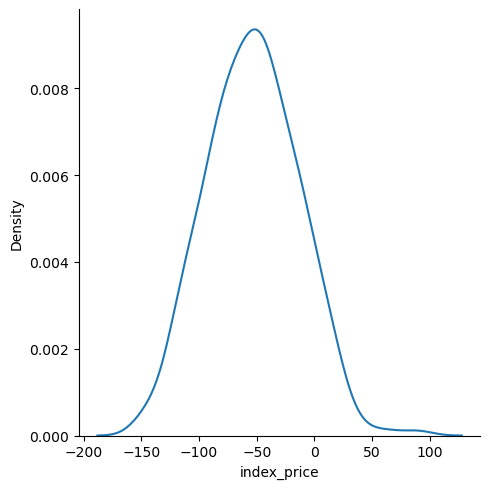

In [ ]:
# plot the residuals 
sns.displot(residual,kind='kde')

# so the model that we have created is good.


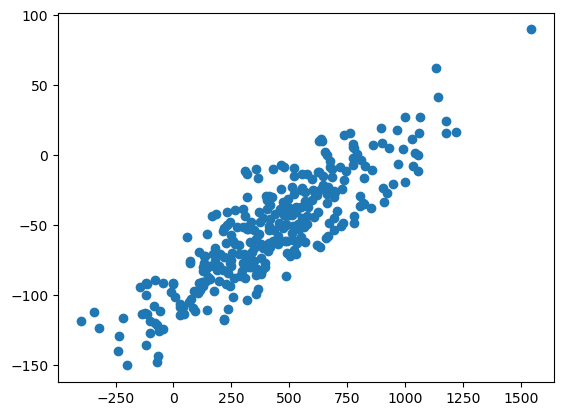

In [ ]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residual)

# if this plot has a uniform distribution then the prediction is right.

So its a good model fit